### NAME: OLAWALE PAUL OYADEYI 

### OBJECTIVE

Lower back pain is a major cause of morbidity in the developed world, affecting 40% of people at some point in their lives. Back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine. 

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also lead to back muscle spasms, which can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. 

The spine of each patient was classified as - normal or abnormal, by practitioners, using the collected physical spine 
details/data. 

Using Logistics Regression and possible Optimization technique; predict over the discrette class Normal or Abnormal spine class 

#### DATA COLUMN ATTRIBUTES

1. Pelvic_incidence: angle between a line perpendicular to the sacral plate at its midpoint and a line connecting this point to the femoral head axis.
2. Pelvic tilt: is a position-dependent parameter defined as the angle created by a line running from the sacral endplate midpoint to the center of the bifemoral heads and the vertical axis
3. Lumbar_lordosis_angle: is defined by the angle between the upper plane of the L1 lumbar vertebrae and the upper plane of the S1 sacral vertebrae.
4. Sacral_slope: is defined as the angle between the horizontal and the sacral plate, and is a critical spinal parameter in the analysis of sagittal balance.
5. Pelvic_radius: The distance from the hip axis to the posterior-superior corner of the S1 endplate
6. Degree_spondylolisthesis: spondylolisthesis is a forward slip of one vertebra. Spondylolisthesis usually occurs towards the base of your spine in the lumbar area. The degree of spondylolisthesis describes the severity of vertebral body slipped forward.
7. Pelvic_slope: is the angle between a vertical line and the CS segment
8. Direct_tilt: *No Information*
9. Thoracic_slope: thoracic  angle between T1 slope and neck tilt
10. Cervical_tilt:n angle formed between the vertical line from the center of T1UEP and the line from the center of T1UEP to the center of the C2 vertebra
11. Sacrum_angle: is the angle formed by the true conjugate with the two pieces of the sacrum.
12. Scoliosis_slope: Scoliosis is a sideways curvature of the spine it represents the angle formed from the curvature of the spine
13. Status:- Normal or Abnormal

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to plot univariate and bivariate plot
from utils import histogram_boxplot, labeled_barplot

# to normalize the data
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import (precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score,
                           precision_recall_curve,
                           roc_auc_score,
                            confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)

In [3]:
# Load data 
df = pd.read_csv("Backpain.csv")
df.head(3)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal


In [4]:
# Data shape with 13columns and 310 rows
df.shape 

(310, 13)

In [5]:
# Data columns 
df.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')

In [6]:
# Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [7]:
# Statiscal description of data 
df.describe(include = "number").T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
# determine missing values 
df.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

In [9]:
# Determine for duplicacy
df.duplicated().sum()

0

In [10]:
df["Status"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [11]:
# As a preprocessing approach, the categorical classes will be encoded  
df.replace({'Abnormal': 1, 'Normal': 0}, inplace = True)

In [12]:
# Confirm unique values and its data type 
df["Status"].unique()

array([1, 0], dtype=int64)

In [13]:
# Show of imbalance class which is to be handled later in the analysis 
df["Status"].value_counts()

1    210
0    100
Name: Status, dtype: int64

In [14]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [15]:
columns = list(df)[:-1]
df[columns].head(3)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221


#### VIsualise the Data 

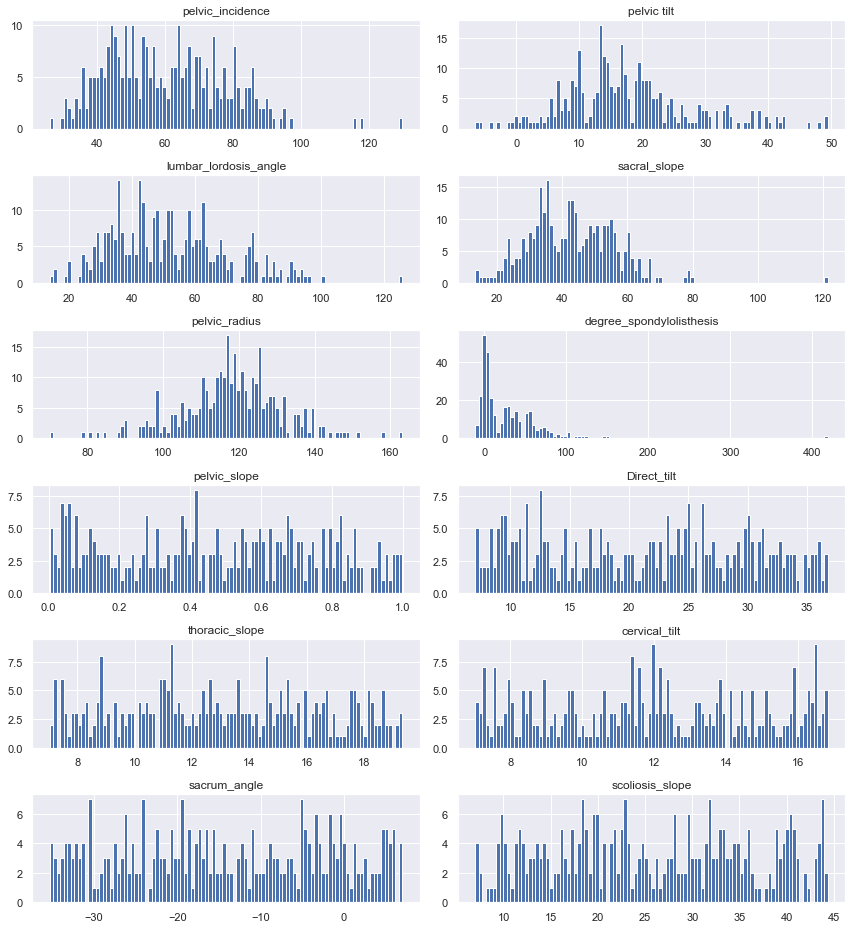

In [16]:
df[columns].hist(stacked = False, bins = 100, figsize = (12,30), layout = (14, 2))
plt.tight_layout();

#### Determine correlation between Independent variables 

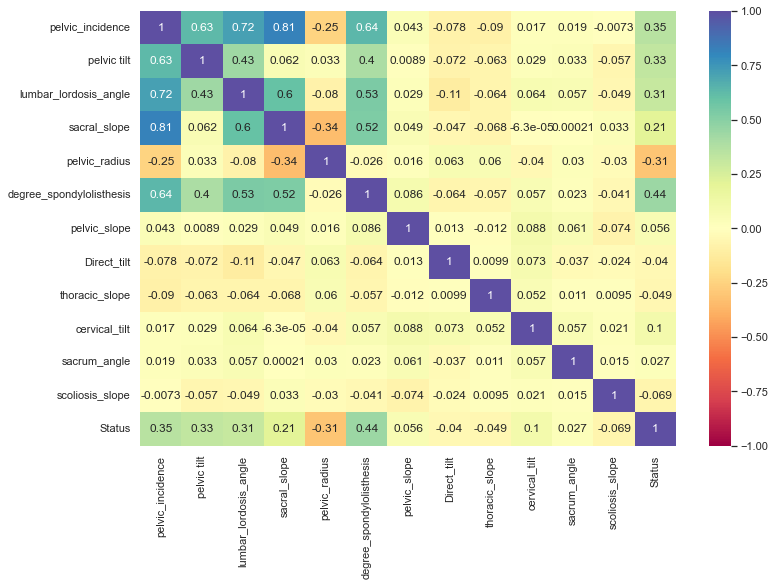

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, vmin =-1, vmax = 1,cmap = "Spectral"); 

In [18]:
x = df.drop("Status", axis = 1)
y = df['Status']

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 1)
# Stratify is set too the target or class becasue we d want the same proportion of the 60/40 been splitted on the 80/20 as the train test split ration  

In [20]:
y_test.value_counts(normalize = True) #As can see, the percentage split of the 80% and 20% on the train test split on the y is approx equal to the 60/40 ratio
# That is wat stratify does  

1    0.677419
0    0.322581
Name: Status, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [22]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(solver="liblinear", random_state = 1)
# log_reg.fit(x_train_sc, y_train)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state = 1)
log_reg.fit(x_train_sc, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [24]:
print("Train Performace: {:.3f}".format(log_reg.score(x_train_sc, y_train)))
print("Test Performace: {:.3f}".format(log_reg.score(x_test_sc, y_test)))

Train Performace: 0.867
Test Performace: 0.839


In [25]:
def train(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    trained_model = model.fit(x,y)
    preds = trained_model.predict(x)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    return trained_model 

In [26]:
log_reg_model = train(log_reg, x_train_sc, y_train)

Train Accuracy: 0.8669354838709677


In [27]:
# Function to evaluate the model and compute metrics on test Data 
def evaluate (model, x, y, threshold = 0.5):
    """ function to evaluate our trained model with different metrics 
    model : Trained Model (classifier)
    
    x:validation features 
    y: Target in validation data 
    Threshold: Value to filter predictions 
    """
    
    pred_proba = model.predict_proba(x)[:, 1] #This will return x 2 array where the 2 is column with prob for the 
    pred_class = np.round(pred_proba  > threshold ) #This converts to 0 or 1 
    acc = accuracy_score (y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score (y, pred_class)
    f1 = f1_score (y, pred_class)
    
    df = pd.DataFrame({ "Accuracy": acc, 
                       "Precision": precision, 
                       "Recall":recall,
                       "F1" : f1}, index = [0])
    conf = confusion_matrix(y, pred_class, labels = [0,1]) ##If the class is more than 2, then use 0, 1, 2 
    disp = ConfusionMatrixDisplay (conf, display_labels = [0,1]) #If the class is more than 2, then use 0, 1, 2 
    disp.plot()
    plt.show()
    return df 

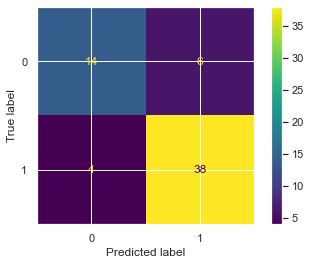

,Accuracy,Precision,Recall,F1
0,0.83871,0.863636,0.904762,0.883721


In [28]:
log_reg_df = evaluate (log_reg_model, x_test_sc, y_test)
log_reg_df

### AUC - ROC for Model Optimzation 

In [30]:
preds = log_reg_model.predict_proba(x_test_sc)[:, 1] #recall that log_reg_model is like a train/fit part of training fucntion, so 
# u can call it up for predicting or even fitting again 
auc = roc_auc_score(y_test, preds)
auc  

0.9154761904761904

Deduction 

Approximately, 92% of the time, the model will distinguish between patient whose spine is identified as Normal or abnormal. Abnormal is a symptom to a backpain and converse   


In [ ]:
## Plot the AUC-ROC curve  

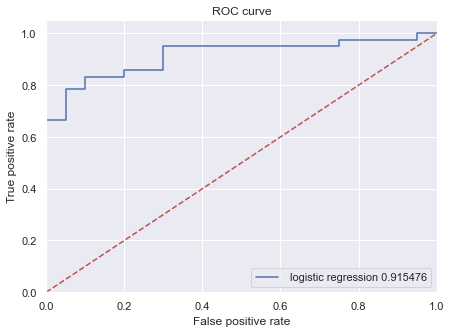

In [31]:
#auc = roc_auc_score(y_test, preds)
fpr, tpr, label = roc_curve(y_test, preds)
plt.figure(figsize = (7,5))
plt.plot(fpr, tpr, label = f" logistic regression {auc:2f}")
plt.plot ([0,1], [0,1], "r--") #r--- is to make the line a broken dash lines 
plt.xlim([0.0, 1.0]) #Making th plot more coloful  
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show;
          